In [13]:
import pandas as pd
import numpy as np
import time

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_classif


from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

In [14]:
# load the Santander customer satisfaction dataset from Kaggle

data = pd.read_csv('2018Floor3_cleaned.csv')
data.shape

(264960, 30)

In [15]:
data

,Date,z1_AC1(kW),z1_AC2(kW),z1_AC3(kW),z1_AC4(kW),z1_Light(kW),z1_Plug(kW),z1_S1(degC),z1_S1(RH%),z1_S1(lux),...,z4_Plug(kW),z4_S1(degC),z4_S1(RH%),z4_S1(lux),z5_AC1(kW),z5_Light(kW),z5_Plug(kW),z5_S1(degC),z5_S1(RH%),z5_S1(lux)
0,2018-07-01 00:00:00,0.0,0.0,0.0,8.74,0.00,0.22,28.28,62.50,0.0,...,0.07,0.0,0.0,0.0,0.0,0.0,0.15,27.73,62.86,0.0
1,2018-07-01 00:01:00,0.0,0.0,0.0,8.74,0.00,0.23,28.29,62.50,0.0,...,0.07,0.0,0.0,0.0,0.0,0.0,0.14,27.73,62.87,0.0
2,2018-07-01 00:02:00,0.0,0.0,0.0,8.61,0.00,0.22,28.29,62.50,0.0,...,0.08,0.0,0.0,0.0,0.0,0.0,0.14,27.72,62.88,0.0
3,2018-07-01 00:03:00,0.0,0.0,0.0,8.81,0.01,0.23,28.29,62.50,0.0,...,0.08,0.0,0.0,0.0,0.0,0.0,0.14,27.72,62.88,0.0
4,2018-07-01 00:04:00,0.0,0.0,0.0,8.89,0.00,0.22,28.29,62.51,0.0,...,0.07,0.0,0.0,0.0,0.0,0.0,0.14,27.72,62.88,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264955,2018-12-31 23:55:00,0.0,0.0,0.0,0.00,0.00,0.27,0.00,0.00,0.0,...,0.05,0.0,0.0,0.0,0.0,0.0,0.04,0.00,0.00,0.0
264956,2018-12-31 23:56:00,0.0,0.0,0.0,0.00,0.00,0.27,0.00,0.00,0.0,...,0.05,0.0,0.0,0.0,0.0,0.0,0.04,0.00,0.00,0.0
264957,2018-12-31 23:57:00,0.0,0.0,0.0,0.00,0.00,0.23,0.00,0.00,0.0,...,0.05,0.0,0.0,0.0,0.0,0.0,0.04,0.00,0.00,0.0
264958,2018-12-31 23:58:00,0.0,0.0,0.0,0.00,0.00,0.30,0.00,0.00,0.0,...,0.05,0.0,0.0,0.0,0.0,0.0,0.04,0.00,0.00,0.0


In [16]:
data.drop('Date',axis='columns',inplace=True)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264960 entries, 0 to 264959
Data columns (total 29 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   z1_AC1(kW)    264960 non-null  float64
 1   z1_AC2(kW)    264960 non-null  float64
 2   z1_AC3(kW)    264960 non-null  float64
 3   z1_AC4(kW)    264960 non-null  float64
 4   z1_Light(kW)  264960 non-null  float64
 5   z1_Plug(kW)   264960 non-null  float64
 6   z1_S1(degC)   264960 non-null  float64
 7   z1_S1(RH%)    264960 non-null  float64
 8   z1_S1(lux)    264960 non-null  float64
 9   z2_AC1(kW)    264960 non-null  float64
 10  z2_Light(kW)  264960 non-null  float64
 11  z2_Plug(kW)   264960 non-null  float64
 12  z2_S1(degC)   264960 non-null  float64
 13  z2_S1(RH%)    264960 non-null  float64
 14  z2_S1(lux)    264960 non-null  float64
 15  z3_Light(kW)  264960 non-null  float64
 16  z3_Plug(kW)   264960 non-null  float64
 17  z4_AC1(kW)    264960 non-null  float64
 18  z4_L

<AxesSubplot:>

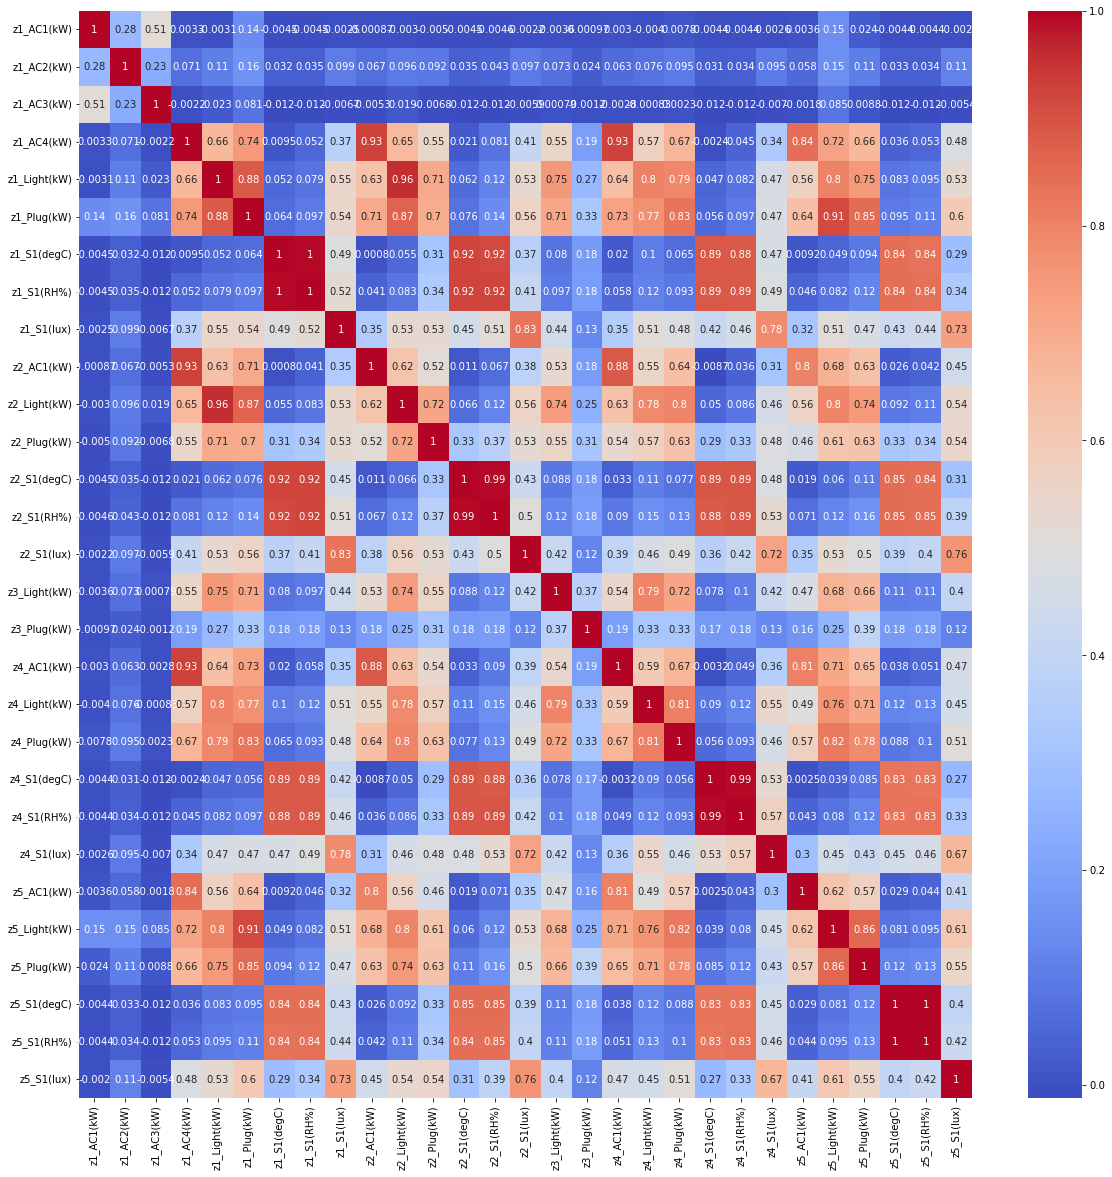

In [18]:
plt.figure(figsize=(20,20))
corrs=data.corr()
sns.heatmap(corrs,annot=True,cmap='coolwarm')

In [19]:
def highly_correlated_features(data, threshold=0.95):

  corr_matrix = data.corr().abs()
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
  highly_correlated_pairs = []
  for column in upper.columns:
    for row in upper.index:
      if upper.loc[row, column] > threshold:
        highly_correlated_pairs.append(((row, column), upper.loc[row, column]))
  return highly_correlated_pairs

In [20]:
highly_correlated_features(data)

[(('z1_S1(degC)', 'z1_S1(RH%)'), 0.9953823289042788),
 (('z1_Light(kW)', 'z2_Light(kW)'), 0.9598074647280342),
 (('z2_S1(degC)', 'z2_S1(RH%)'), 0.9930130754724443),
 (('z4_S1(degC)', 'z4_S1(RH%)'), 0.9939526802806132),
 (('z5_S1(degC)', 'z5_S1(RH%)'), 0.9969233956178107)]

In [21]:
high_corrs=highly_correlated_features(data)
columns_to_drop=[]
for i in high_corrs:
  columns_to_drop.append(i[0][0])
columns_to_drop

['z1_S1(degC)', 'z1_Light(kW)', 'z2_S1(degC)', 'z4_S1(degC)', 'z5_S1(degC)']

In [22]:
data.drop(columns_to_drop,axis='columns',inplace=True)

In [23]:
#Function to get the constant or nearly constant features
def constant_columns(df,thershold=0.0002):
  constant_columns = []
  for column in df.columns:
    unique_count=df[column].nunique()
    unique_ratio=unique_count/len(df)
    if unique_ratio<thershold:
      constant_columns.append(column)
  return constant_columns

In [24]:
columns_to_drop=constant_columns(data)
columns_to_drop

['z1_AC1(kW)', 'z1_AC3(kW)']

In [25]:
# Drop columns that they're almost constant
columns_to_drop=constant_columns(data)
data.drop(columns_to_drop,axis='columns',inplace=True)

<AxesSubplot:>

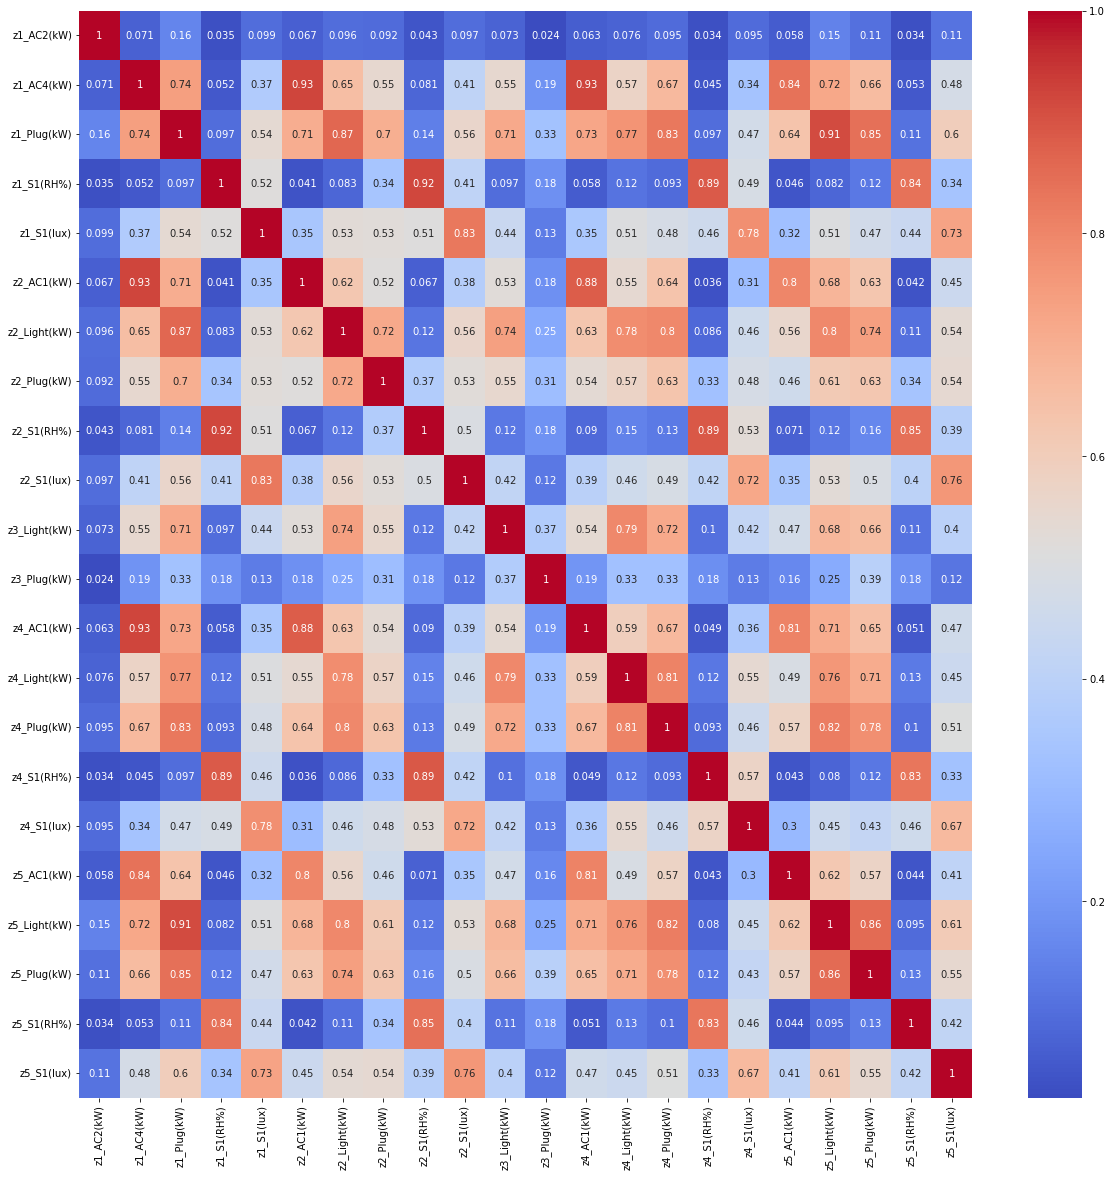

In [26]:
plt.figure(figsize=(20,20))
corrs=data.corr()
sns.heatmap(corrs,annot=True,cmap='coolwarm')

In [28]:
data.shape

(264960, 22)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264960 entries, 0 to 264959
Data columns (total 22 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   z1_AC2(kW)    264960 non-null  float64
 1   z1_AC4(kW)    264960 non-null  float64
 2   z1_Plug(kW)   264960 non-null  float64
 3   z1_S1(RH%)    264960 non-null  float64
 4   z1_S1(lux)    264960 non-null  float64
 5   z2_AC1(kW)    264960 non-null  float64
 6   z2_Light(kW)  264960 non-null  float64
 7   z2_Plug(kW)   264960 non-null  float64
 8   z2_S1(RH%)    264960 non-null  float64
 9   z2_S1(lux)    264960 non-null  float64
 10  z3_Light(kW)  264960 non-null  float64
 11  z3_Plug(kW)   264960 non-null  float64
 12  z4_AC1(kW)    264960 non-null  float64
 13  z4_Light(kW)  264960 non-null  float64
 14  z4_Plug(kW)   264960 non-null  float64
 15  z4_S1(RH%)    264960 non-null  float64
 16  z4_S1(lux)    264960 non-null  float64
 17  z5_AC1(kW)    264960 non-null  float64
 18  z5_L

In [30]:
data.head()

,z1_AC2(kW),z1_AC4(kW),z1_Plug(kW),z1_S1(RH%),z1_S1(lux),z2_AC1(kW),z2_Light(kW),z2_Plug(kW),z2_S1(RH%),z2_S1(lux),...,z4_AC1(kW),z4_Light(kW),z4_Plug(kW),z4_S1(RH%),z4_S1(lux),z5_AC1(kW),z5_Light(kW),z5_Plug(kW),z5_S1(RH%),z5_S1(lux)
0,0.0,8.74,0.22,62.50,0.0,0.0,0.0,0.15,65.74,0.0,...,0.0,0.0,0.07,0.0,0.0,0.0,0.0,0.15,62.86,0.0
1,0.0,8.74,0.23,62.50,0.0,0.0,0.0,0.15,65.74,0.0,...,0.0,0.0,0.07,0.0,0.0,0.0,0.0,0.14,62.87,0.0
2,0.0,8.61,0.22,62.50,0.0,0.0,0.0,0.15,65.74,0.0,...,0.0,0.0,0.08,0.0,0.0,0.0,0.0,0.14,62.88,0.0
3,0.0,8.81,0.23,62.50,0.0,0.0,0.0,0.15,65.73,0.0,...,0.0,0.0,0.08,0.0,0.0,0.0,0.0,0.14,62.88,0.0
4,0.0,8.89,0.22,62.51,0.0,0.0,0.0,0.15,65.73,0.0,...,0.0,0.0,0.07,0.0,0.0,0.0,0.0,0.14,62.88,0.0


In [31]:
data.to_csv('2018Floor3_features_selected.csv',index=False)